In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.patches as mpatches
import numpy as np


import mahotas as mh

from skimage import io
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, opening, square, disk
from skimage.color import label2rgb, rgb2gray

from skimage.filters import threshold_otsu, rank, threshold_adaptive, try_all_threshold, threshold_local
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

from skimage.filters import gaussian

In [2]:
def get_frac_thresh(arr, frac):
    min_lum = np.min(arr)
    max_lum = np.max(arr)
    return min_lum + frac*(max_lum - min_lum)

In [6]:
def thresholding_and_segmentation(img_path):
    
    image = io.imread(img_path)
    
    image = rgb2gray(image)
    
    radius = 30
    selem = disk(radius)

    thre = get_frac_thresh(image, 0.2)
    
    thresholded = image > thre
    bw = closing(thresholded)
    label_image = label(bw)

    fig, ax = plt.subplots(figsize=(6, 6))

    ax.imshow(thresholded)

    areas = np.array([])
    
    for region in regionprops(label_image):
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
        
        ax.add_patch(rect)


    ax.set_axis_off()

    fig.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


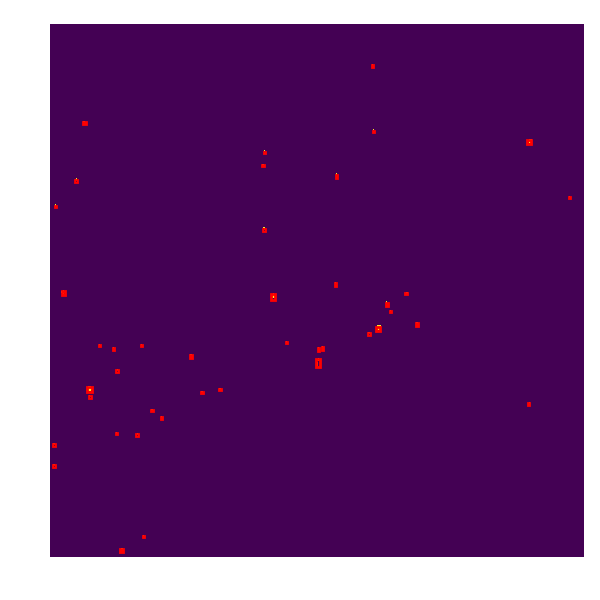

In [7]:
homer_path = "/media/ula/D/adam_catfish/catfish_homer_tst.gif"
arc_path = "/media/ula/D/adam_catfish/catfish_arc_tst.gif"

thresholding_and_segmentation(arc_path)

In [ ]:
def local_thresholding(img_path):
    
    image = io.imread(img_path)
    
    image = rgb2gray(image)
    
    #image = gaussian(image, 3)
    
    methods = ['gaussian', 'mean', 'median']

    for method in methods:
        local_thre = threshold_local(image, method = method, block_size=55)
        thresholded = image > 2*local_thre

        fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharex=True, sharey=True)
        ax = axes.ravel()

        ax[0].imshow(local_thre)
        ax[0].set_title("Threshold")
        ax[1].imshow(thresholded)
        ax[1].set_title("Thresholded")


        for a in ax:
            a.set_axis_off()
        
        fig.tight_layout()
        plt.show()

In [ ]:
local_thresholding(arc_path)